# Análise e Exploração sobre Adult Income Dataset

Contém informações de censos com o objetivo de prever se a pessoa tem um salário acima ou abaixo de 50K com base em atributos demográficos.

Objetivo: Classificar os indivíduos com base na renda anual.

1. age: Idade do indivíduo.

1. workclass: Categoria de emprego do indivíduo, que indica o tipo de empregador ou a situação de emprego.

1. fnlwgt: Peso final para amostragem, utilizado para ajustar representatividade dos indivíduos na amostra.

1. education: Nível educacional do indivíduo.

1. marital-status: Estado civil.

1. occupation: Ocupação ou setor de trabalho.

1. relationship: Relação do indivíduo com a unidade familiar.

1. race: Raça do indivíduo.

1. sex: Gênero do indivíduo, com valores como Male (masculino) e Female (feminino).

1. capital-gain: Ganho de capital anual, valor monetário recebido de investimentos, como ações ou venda de bens.

1. capital-loss: Perda de capital anual, valor monetário perdido em investimentos.

1. hours-per-week: Quantidade de horas trabalhadas por semana.

1. native-country: País de origem do indivíduo.

1. income: Rótulo de classe binária que indica se a renda anual é <=50K ou >50K.

In [1]:
!pip install kaggle

In [2]:
!kaggle datasets download -d uciml/adult-census-income
!unzip adult-census-income.zip


Dataset URL: https://www.kaggle.com/datasets/uciml/adult-census-income
License(s): CC0-1.0
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 111MB/s]
Archive:  adult-census-income.zip
  inflating: adult.csv               


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import zscore
from scipy import stats
import numpy as np
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score


In [4]:
df_adult_income = pd.read_csv('adult.csv')
df_adult_income.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df_adult_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df_adult_income.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df_adult_income['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [8]:
count_question_mark = (df_adult_income['workclass'] == '?').sum()
count_question_mark

1836

In [9]:
df_adult_income['occupation'].unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [10]:
count_question_mark = (df_adult_income['occupation'] == '?').sum()
count_question_mark

1843

In [11]:
df_adult_income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [12]:
df_adult_income['native.country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [13]:
count_question_mark = (df_adult_income['native.country'] == '?').sum()
count_question_mark

583

In [14]:
df_adult_drop_unkowns = df_adult_income[(df_adult_income['occupation'] != '?')
& (df_adult_income['native.country'] != '?') & (df_adult_income['workclass'] != '?')]
df_adult_drop_unkowns.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [15]:
df_adult_drop_unkowns.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [16]:
df_adult_drop_unkowns.columns = df_adult_drop_unkowns.columns.str.replace('.', '_')
df_adult_drop_unkowns.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [17]:
df_adult_encoded = pd.get_dummies(df_adult_drop_unkowns, columns=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])
df_adult_encoded.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
1,82,132870,9,0,4356,18,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,54,140359,4,0,3900,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,41,264663,10,0,3900,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
5,34,216864,9,0,3770,45,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
6,38,150601,6,0,3770,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [18]:
df_adult_encoded.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private',
       ...
       'native_country_Portugal', 'native_country_Puerto-Rico',
       'native_country_Scotland', 'native_country_South',
       'native_country_Taiwan', 'native_country_Thailand',
       'native_country_Trinadad&Tobago', 'native_country_United-States',
       'native_country_Vietnam', 'native_country_Yugoslavia'],
      dtype='object', length=105)

In [19]:
df_adult_encoded.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
1,82,132870,9,0,4356,18,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,54,140359,4,0,3900,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,41,264663,10,0,3900,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
5,34,216864,9,0,3770,45,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
6,38,150601,6,0,3770,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [20]:
df_adult_encoded['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [21]:
df_adult_encoded['income'] = df_adult_encoded['income'].apply(lambda x: 0 if x == '<=50K' else 1)
df_adult_encoded

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
1,82,132870,9,0,4356,18,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,54,140359,4,0,3900,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,41,264663,10,0,3900,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
5,34,216864,9,0,3770,45,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
6,38,150601,6,0,3770,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
32557,27,257302,12,0,0,38,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
32558,40,154374,9,0,0,40,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
32559,58,151910,9,0,0,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False


<ipython-input-22-a3536107345c>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_income_counts = df_adult_encoded.groupby(['age_group', 'income']).size().reset_index(name='count')


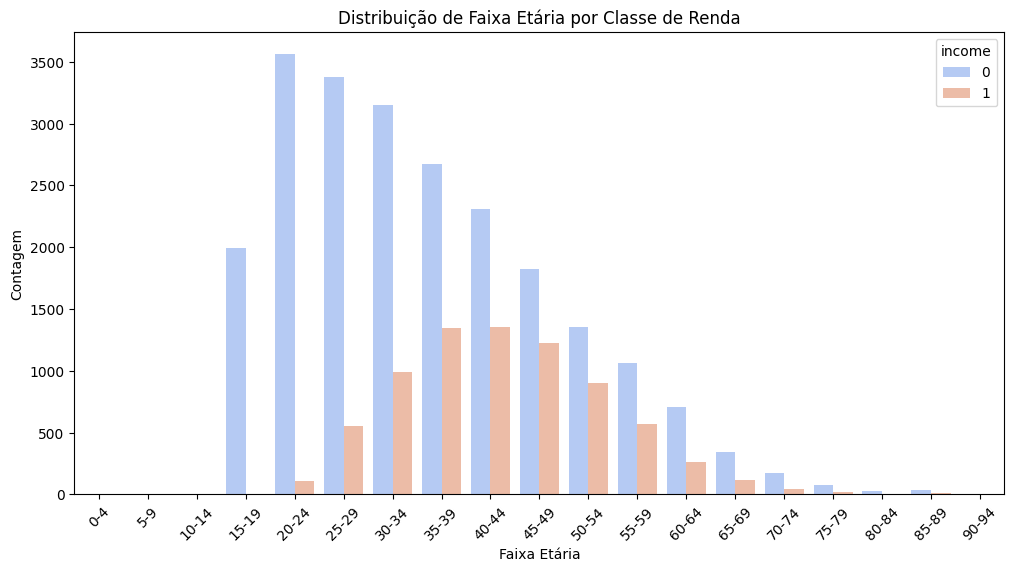

In [22]:
df_adult_encoded['age_group'] = pd.cut(df_adult_encoded['age'], bins=range(0, 100, 5), labels=[f'{i}-{i+4}' for i in range(0, 95, 5)])

age_income_counts = df_adult_encoded.groupby(['age_group', 'income']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='count', hue='income', data=age_income_counts, palette='coolwarm')

plt.title('Distribuição de Faixa Etária por Classe de Renda')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

In [23]:
df_adult_encoded.drop(columns=['age_group'], inplace=True)


### Avaliação do grafico

Algumas coisas são interessante de observar. A nossa base tem muitos registros com pessoas que ganham até 50 mil por ano e em varias faixam mostrando essa diferença e até vemos uma proximação ali pelo 35-39 e se extende até 45-49(sendo bondoso). E tamém uma queda nos registros dos valores de até 50 mil na faixa de 45-49.

Também é interessante olhar com o passar do tempo mais pessoas vão ganhando mais de 50 mil anuais, isso mostra um crescimento de remuneração por idade bem consideravel.

Obviamente, não é por causa apenas da idade que esse cresce é evidente mas que com o passar do tempo as pessoas acabam se especizando cada vez mais.

In [24]:
print(list(df_adult_encoded.columns))


['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'income', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital_status_Divorced', 'marital_status_Married-AF-spouse', 'marital_status_Married-civ-spouse', 'marital_status_Married-spouse-absent', 'marital_status_Never-married', 'marital_status_Separated', 'marital_status_Widowed', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-c

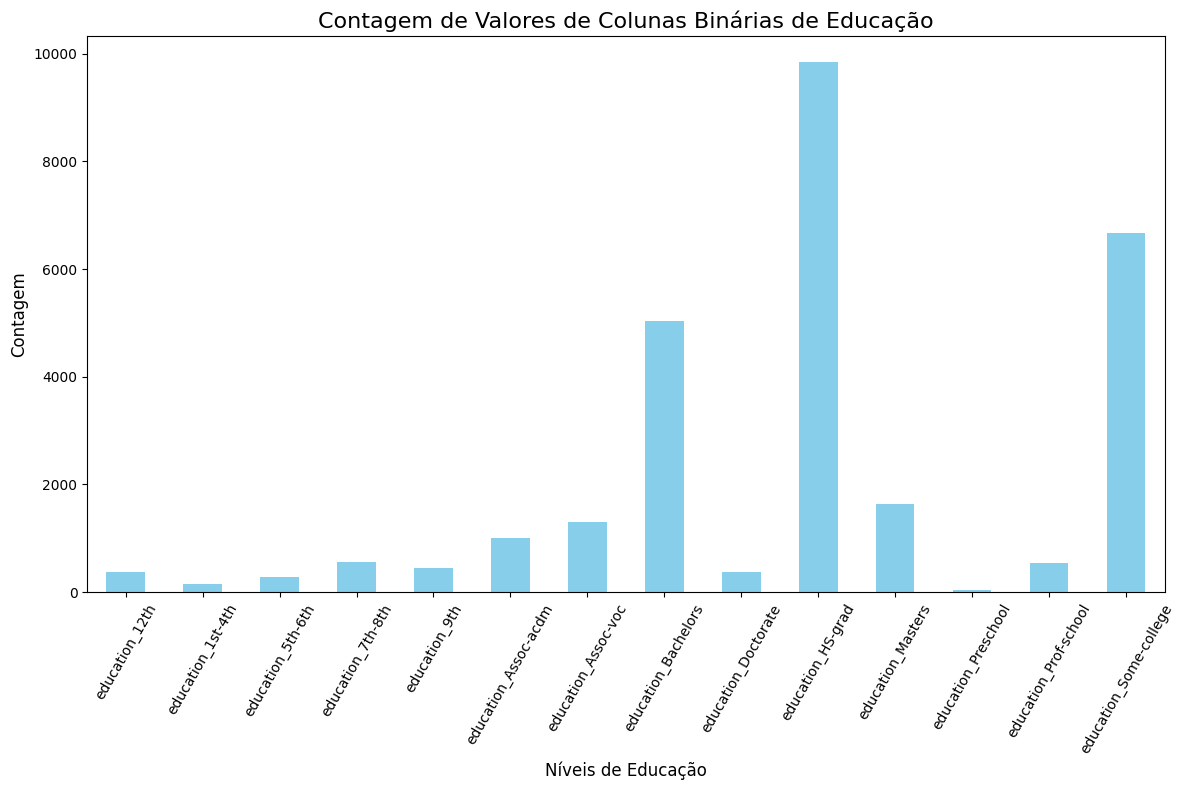

In [25]:
education_columns = [
    'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
    'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors',
    'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool',
    'education_Prof-school', 'education_Some-college'
]

plt.figure(figsize=(12, 8))
df_adult_encoded[education_columns].sum().plot(kind='bar', color='skyblue')

plt.title('Contagem de Valores de Colunas Binárias de Educação', fontsize=16)
plt.xlabel('Níveis de Educação', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

### Avaliação do grafico Contagem de Valores de Colunas Binárias de Educação

Podemos observar a variação de estudantes, desde aqueles que ainda estão na escola até os que possuem doutorado. Isso indica que a base de dados coletou informações de uma ampla gama de níveis educacionais.

Além disso, vemos um número considerável de pessoas com o Ensino Médio completo (High School) e algumas com Bacharelado. Esse padrão reflete a estrutura educacional comum, onde a maioria das pessoas conclui o Ensino Médio, enquanto o Bacharelado é um pré-requisito importante para diversas carreiras.

Esse gráfico também nos permite analisar como o nível de escolaridade pode impactar a divisão entre as pessoas com e sem diploma universitário. Em geral, indivíduos com nível superior tendem a estar mais representados nas faixas de renda mais altas (acima de 50K), o que sugere que a educação superior está correlacionada com uma maior renda.

Finalmente, podemos observar a diferença entre pessoas que continuaram seus estudos, obtendo diplomas de graduação ou pós-graduação, e aquelas que não continuaram seus estudos. Isso destaca a importância da educação na trajetória profissional e financeira dos indivíduos, oferecendo insights valiosos sobre como diferentes níveis de escolaridade podem influenciar a geração de renda ao longo da vida.


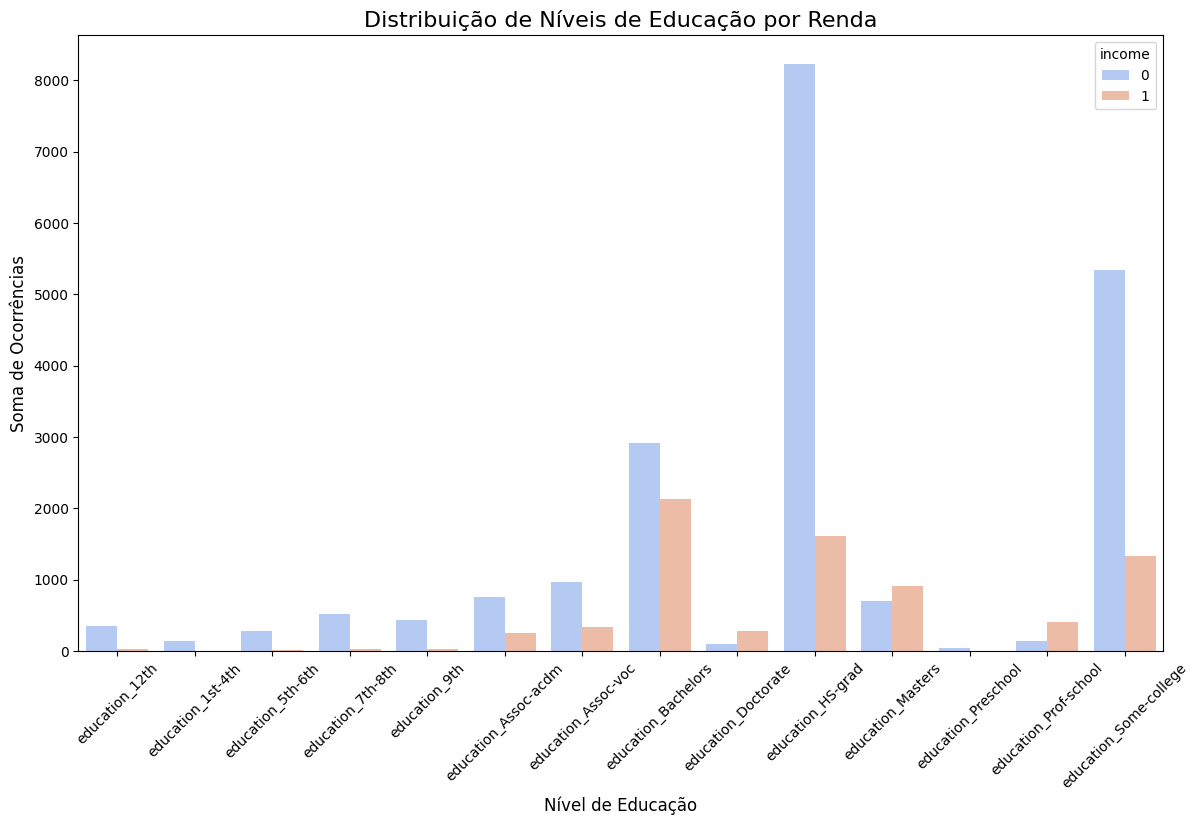

In [26]:
education_counts = df_adult_encoded[education_columns + ['income']].groupby('income')[education_columns].sum().reset_index()

education_long = education_counts.melt(id_vars=['income'], value_vars=education_columns, var_name='education', value_name='count')

plt.figure(figsize=(14, 8))
sns.barplot(x='education', y='count', hue='income', data=education_long, palette="coolwarm")

plt.title('Distribuição de Níveis de Educação por Renda', fontsize=16)
plt.xlabel('Nível de Educação', fontsize=12)
plt.ylabel('Soma de Ocorrências', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Avaliação do grafico Distribuição de Níveis de Educação por Renda

Como já foi mencionado, vemos uma clara diferença entre as pessoas que concluíram o Ensino Médio (High School) e aquelas que possuem um Bacharelado. Ao analisar o gráfico, podemos observar que a diferença entre os formados no Ensino Médio que ganham até 50 mil é significativamente maior do que entre aqueles que concluíram o Ensino Médio e ganham mais de 50 mil. Isso sugere que o Ensino Médio por si só não é um fator determinante para alcançar uma renda superior a 50 mil anuais.

Quando comparamos com os indivíduos que possuem um Bacharelado, vemos que a distribuição entre as pessoas que ganham até 50 mil e as que ganham mais de 50 mil é relativamente equilibrada. Esse padrão indica que o nível de escolaridade superior tem um impacto considerável na renda pessoal, refletindo a importância da educação terciária no aumento do potencial de ganhos.

Outro dado importante a ser considerado é o nível de educação "Doctorate". A diferença de pessoas com doutorado que ganham mais de 50 mil comparada àquelas que ganham até 50 mil é ainda mais expressiva. Isso reforça a ideia de que a educação avançada (como doutorado) está fortemente associada a rendas mais altas, destacando a relevância de uma formação acadêmica mais profunda para alcançar salários elevados.



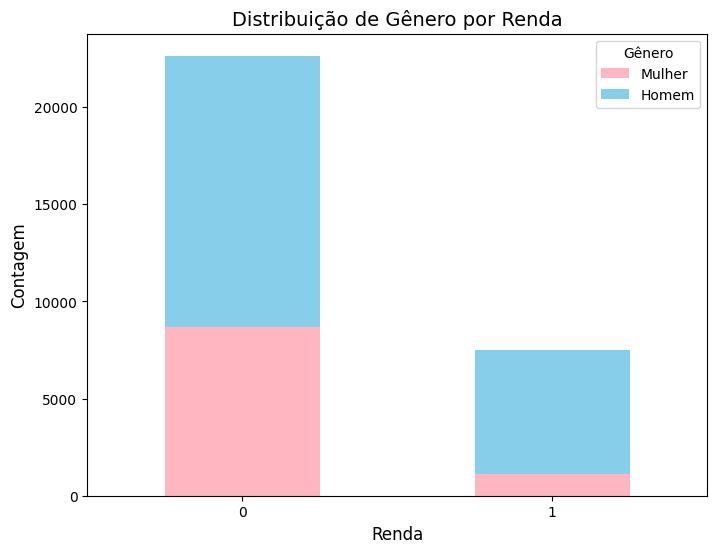

In [27]:
df_gender_income = df_adult_encoded[['sex_Female', 'sex_Male', 'income']].groupby(['income']).sum().reset_index()

df_gender_income.plot(kind='bar', x='income', stacked=True, figsize=(8, 6), color=['#FFB6C1', '#87CEEB'])

plt.title('Distribuição de Gênero por Renda', fontsize=14)
plt.xlabel('Renda', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Gênero', labels=['Mulher', 'Homem'])
plt.show()

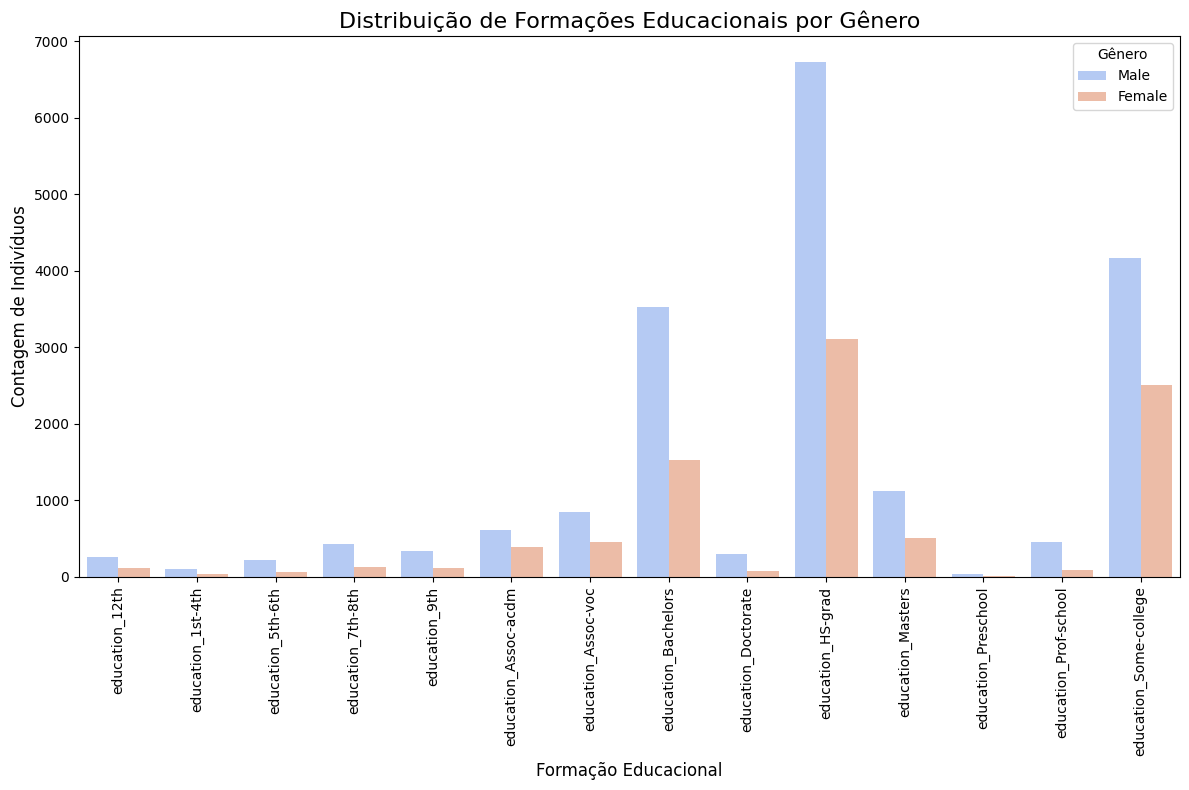

In [28]:
df_education_gender = df_adult_encoded[education_columns + ['sex_Female', 'sex_Male']].groupby(['sex_Female', 'sex_Male']).sum().reset_index()

df_education_gender = df_adult_encoded[education_columns + ['sex_Female', 'sex_Male']].groupby('sex_Female').sum().reset_index()

df_long = df_education_gender.melt(id_vars=['sex_Female'], value_vars=education_columns,
                                   var_name='Education', value_name='Count')

df_long['sex'] = df_long['sex_Female'].apply(lambda x: 'Female' if x == 1 else 'Male')

plt.figure(figsize=(12, 8))
sns.barplot(data=df_long, x='Education', y='Count', hue='sex', palette="coolwarm")

plt.title('Distribuição de Formações Educacionais por Gênero', fontsize=16)
plt.xlabel('Formação Educacional', fontsize=12)
plt.ylabel('Contagem de Indivíduos', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Gênero')
plt.tight_layout()

plt.show()

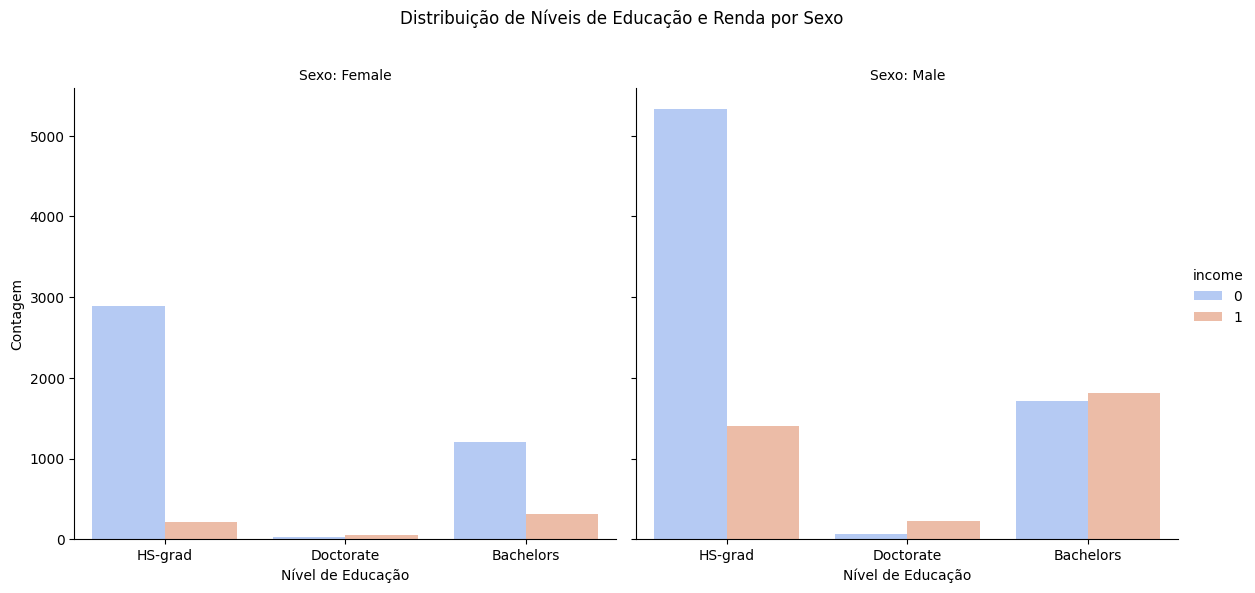

In [29]:
df_filtered = df_adult_encoded[['income', 'education_HS-grad', 'education_Bachelors', 'education_Doctorate', 'sex_Female', 'sex_Male']].copy()

def get_education_level(row):
    if row['education_HS-grad'] == 1:
        return 'HS-grad'
    elif row['education_Bachelors'] == 1:
        return 'Bachelors'
    elif row['education_Doctorate'] == 1:
        return 'Doctorate'
    return None

df_filtered['education_level'] = df_filtered.apply(get_education_level, axis=1)

df_filtered['sex'] = df_filtered.apply(lambda row: 'Female' if row['sex_Female'] == 1 else 'Male', axis=1)

df_filtered = df_filtered.dropna(subset=['education_level'])

g = sns.catplot(
    data=df_filtered,
    x="education_level",
    hue="income",
    col="sex",
    kind="count",
    palette="coolwarm",
    height=6,
    aspect=1
)

g.set_axis_labels("Nível de Educação", "Contagem")
g.set_titles("Sexo: {col_name}")

plt.subplots_adjust(top=0.85)
g.fig.suptitle("Distribuição de Níveis de Educação e Renda por Sexo")


plt.show()

In [30]:
female_count = df_adult_encoded['sex_Female'].sum()
male_count = df_adult_encoded['sex_Male'].sum()

print(f"Total de mulheres: {female_count}")
print(f"Total de homens: {male_count}")

Total de mulheres: 9782
Total de homens: 20380


### Avaliação do grafico Distribuição de Gênero por Renda, Distribuição de Formações Educacionais por Gênero e Distribuição de Níveis de Educação e Renda por Sexo

Inicialmente, observamos que, em geral, as mulheres tendem a ganhar menos que os homens neste conjunto de dados. Ao aprofundarmos a análise no nível de escolaridade, notamos que há uma quantidade menor de mulheres nos níveis educacionais mais elevados em comparação aos homens. Por exemplo, no nível de Bacharelado, o número de homens é significativamente maior do que o de mulheres.

Essa diferença se reflete diretamente na renda entre gêneros. Com menos mulheres em níveis de formação que favorecem salários mais altos, vemos também uma diferença nas faixas de renda. É interessante notar que, entre os homens com Bacharelado, a maioria ganha mais de 50 mil por ano. Em contraste, entre as mulheres com Bacharelado, é mais comum que ganhem até 50 mil. Esse comportamento sugere que, apesar de o Bacharelado ser uma qualificação importante, há fatores externos que podem estar influenciando a renda das mulheres de forma desproporcional.

Outra possível interpretação é o desequilíbrio de dados: o conjunto possui aproximadamente 20 mil homens, e cerca de 9.700 são mulheres. Esse desbalanceamento pode indicar que a coleta de dados para mulheres foi menos representativa, o que pode impactar as conclusões sobre a influência do gênero na renda.




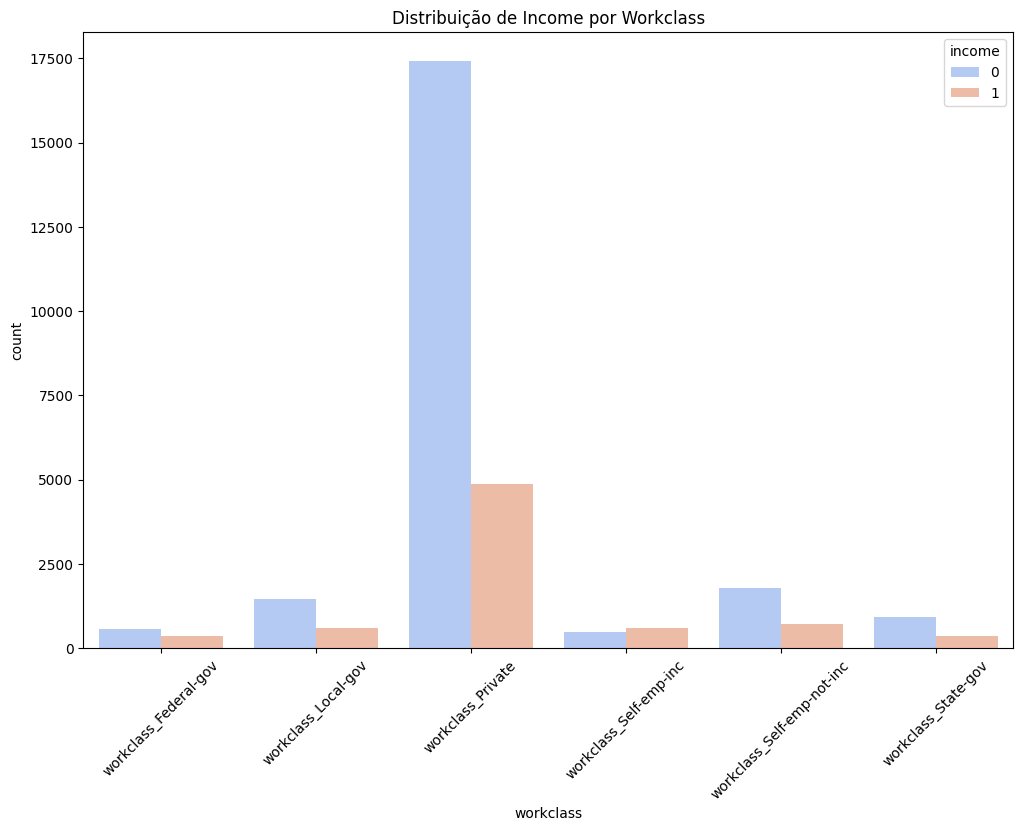

In [31]:
workclass_income_columns = ['workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private',
                            'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
                            'workclass_State-gov', 'income']

df_workclass_income = df_adult_encoded[workclass_income_columns]

df_workclass_income_melted = df_workclass_income.melt(
    id_vars=['income'],
    value_vars=['workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private',
                'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov'],
    var_name='workclass',
    value_name='present'
)

df_workclass_income_melted = df_workclass_income_melted[df_workclass_income_melted['present'] == 1]

plt.figure(figsize=(12, 8))
sns.countplot(
    data=df_workclass_income_melted,
    x='workclass',
    hue='income',
    palette='coolwarm',
    dodge=True
)

plt.title('Distribuição de Income por Workclass')

plt.xticks(rotation=45)
plt.show()

## Avaliação do grafico Distribuição de Income por Workclass

Observamos que a classe "Private" é a que possui o maior número de pessoas empregadas e, além disso, apresenta uma grande disparidade no pagamento. A diferença entre as pessoas que ganham até 50 mil e as que ganham mais de 50 mil é bastante significativa, com mais de 17.500 pessoas recebendo até 50 mil, enquanto menos de 6.000 pessoas recebem mais de 50 mil.

Uma análise interessante pode ser feita para a classe "Self-emp-inc" (autônomos com rendimento líquido), que se destaca como a única categoria onde o número de pessoas que ganham mais de 50 mil é superior ao número de pessoas que ganham até 50 mil. Porém, o risco de ser autônomo é maior, já que essa categoria não oferece muita segurança financeira e a renda tende a ser bastante variável.

Em todas as outras classes, o número de pessoas que recebem até 50 mil é consideravelmente maior do que o número de pessoas com salários superiores a esse valor.


In [32]:
df_adult_encoded

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
1,82,132870,9,0,4356,18,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,54,140359,4,0,3900,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,41,264663,10,0,3900,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
5,34,216864,9,0,3770,45,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
6,38,150601,6,0,3770,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
32557,27,257302,12,0,0,38,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
32558,40,154374,9,0,0,40,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
32559,58,151910,9,0,0,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [33]:
df_adult_encoded.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private',
       ...
       'native_country_Portugal', 'native_country_Puerto-Rico',
       'native_country_Scotland', 'native_country_South',
       'native_country_Taiwan', 'native_country_Thailand',
       'native_country_Trinadad&Tobago', 'native_country_United-States',
       'native_country_Vietnam', 'native_country_Yugoslavia'],
      dtype='object', length=105)

In [34]:
df_adult_encoded.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238,0.248922
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984,0.432396
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [35]:
df_adult_final = df_adult_encoded[(np.abs(stats.zscore(df_adult_encoded['age'])) < 3)]

In [36]:
df_adult_final.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
count,30042.000000,3.004200e+04,30042.000000,30042.000000,30042.000000,30042.000000,30042.000000
mean,38.257706,1.898986e+05,10.123893,1087.507090,88.152720,40.970941,0.249118
std,12.843716,1.057070e+05,2.545056,7394.183655,403.255605,11.943898,0.432509
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176758e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.785235e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.377200e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,77.000000,1.484705e+06,16.000000,99999.000000,3900.000000,99.000000,1.000000


In [37]:
df_adult_final = df_adult_final[(np.abs(stats.zscore(df_adult_final['hours_per_week'])) < 3)]
df_adult_final.describe()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
count,29608.000000,2.960800e+04,29608.000000,29608.000000,29608.000000,29608.000000,29608.000000
mean,38.218894,1.900553e+05,10.121183,1079.634761,87.820961,40.591225,0.248480
std,12.821745,1.056418e+05,2.539552,7349.130333,402.286848,10.729956,0.432139
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,6.000000,0.000000
25%,28.000000,1.177890e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.786860e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376255e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,77.000000,1.484705e+06,16.000000,99999.000000,3900.000000,76.000000,1.000000


In [38]:
df_adult_final = df_adult_final[(np.abs(stats.zscore(df_adult_final['capital_gain'])) < 3)]
df_adult_final.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
count,29416.00000,2.941600e+04,29416.000000,29416.000000,29416.000000,29416.000000,29416.000000
mean,38.17001,1.900955e+05,10.102937,554.012068,88.394173,40.536987,0.243711
std,12.81915,1.056540e+05,2.529327,2301.368143,403.534855,10.704896,0.429328
min,17.00000,1.376900e+04,1.000000,0.000000,0.000000,6.000000,0.000000
25%,28.00000,1.177890e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.00000,1.787790e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.00000,2.377200e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,77.00000,1.484705e+06,16.000000,22040.000000,3900.000000,76.000000,1.000000


# Modelos

In [39]:
def evaluate_model(model):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

In [40]:
X = df_adult_encoded.drop('income', axis=1)
y = df_adult_encoded['income']

In [50]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [52]:
# Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
# XGBoost
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgboost.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:26:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [54]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
# SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

SVC(random_state=42)

In [57]:
print('Random Forest')
evaluate_model(random_forest)

Random Forest
Acurácia: 0.8986
Precisão: 0.9078
Recall: 0.8870
F1-Score: 0.8973


In [58]:
print('XGBoost')
evaluate_model(xgboost)

XGBoost
Acurácia: 0.9096
Precisão: 0.9230
Recall: 0.8935
F1-Score: 0.9080


In [59]:
print('KNN')
evaluate_model(knn)

KNN
Acurácia: 0.7091
Precisão: 0.6946
Recall: 0.7448
F1-Score: 0.7188


In [60]:
print('SVM')
evaluate_model(svm)

SVM
Acurácia: 0.5941
Precisão: 0.9409
Recall: 0.1994
F1-Score: 0.3290


## Avaliação dos Modelos

Os resultados dos modelos são satisfatórios, com o XGBoost se destacando como o modelo de melhor desempenho, com uma precisão de 92,30% e um recall de 89,35%. Isso significa que o modelo consegue identificar a classe positiva (renda maior que 50 mil) com boa precisão, acertando muitos verdadeiros positivos e verdadeiros negativos, além de minimizar os falsos positivos, o que é essencial para problemas como este.

Em segundo lugar, o Random Forest apresenta uma precisão de 90,78% e recall de 88,70%, demonstrando ser um modelo robusto, com bom desempenho geral. Em situações em que as limitações de processamento ou tempo são mais rígidas, o Random Forest pode ser uma escolha viável, dado que é mais leve para processar em comparação ao XGBoost.

Por outro lado, o SVM não teve um desempenho satisfatório, apesar de uma alta precisão de 94,09%, que pode parecer atraente à primeira vista. O recall de 19,94% indica que o modelo falhou em identificar muitos verdadeiros positivos (pessoas com renda acima de 50 mil). Isso é problemático, especialmente em contextos como concessão de produtos ou programas governamentais, onde a falha em identificar as pessoas corretas pode resultar em desigualdade ou erros no processo de distribuição.

Técnicas Implementadas para Melhorar os Modelos:
1. Tratamento de Outliers: Remoção dos outliers nas variáveis 'age', 'hours_per_week' e 'capital_gain', o que ajudou a melhorar a precisão do modelo e evitar distorções nos dados.

1. Balanceamento de Dados com SMOTE: Utilização da técnica SMOTE para gerar dados sintéticos da classe minoritária. Isso foi essencial, já que o conjunto estava desbalanceado, e o SMOTE ajudou a melhorar a capacidade do modelo em aprender sobre a classe minoritária, que é crucial para uma previsão mais precisa.

1. Transformação das Variáveis Categóricas: Convertemos as variáveis descritivas em variáveis dummies, facilitando o aprendizado do modelo. Isso é importante para que o modelo consiga capturar relações não-lineares entre variáveis categóricas e a variável alvo.

1. Conversão da Coluna Target para Valores Binários: Alteração da coluna income para valores binários (0 ou 1), o que é um pré-processamento necessário para tarefas de classificação.

1. Padronização dos Nomes das Colunas: Alteração dos nomes das colunas para um padrão mais aceitável, substituindo pontos (".") por underscores ("_"). Isso ajuda a evitar problemas ao manipular e treinar o modelo.

**Conclusão**
<p> O XGBoost foi o modelo de melhor desempenho, mas dependendo do cenário, o Random Forest pode ser uma escolha mais viável em termos de processamento. O SVM, por outro lado, se mostrou ineficaz devido ao baixo recall, o que pode gerar consequências negativas, especialmente em cenários críticos como a concessão de benefícios.

O uso das técnicas de pré-processamento foi fundamental para alcançar esses resultados, e elas devem ser consideradas sempre que trabalharmos com datasets desbalanceados ou com variáveis com outliers.
</p>